<a href="https://colab.research.google.com/github/ViolaMario/SpeechClassification/blob/main/FC0408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/driver')
%cd /content/driver/MyDrive/lhs/src
%ls

Mounted at /content/driver
/content/driver/MyDrive/lhs/src
average_1-40hz_20sessions_epo/
fc/
Fs250_0.5-80hz_20sessions_perception_01_label.npy
Fs250_0.5-80hz_20sessions_perception_01_src.mat
Fs250_0.5-80hz_20sessions_perception_02_label.npy
Fs250_0.5-80hz_20sessions_perception_02_src.mat
Fs250_0.5-80hz_20sessions_perception_03_label.npy
Fs250_0.5-80hz_20sessions_perception_03_src.mat
label.mat


In [ ]:
from scipy.io import loadmat

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

In [ ]:
import pickle
import os

connectivity_methods = ["coh", "imcoh","plv","ciplv","pli","wpli"]
Freq_Bands = {"delta": [0.5, 4.0],"theta": [4.0, 8.0], "alpha": [8.0, 13.0], "beta": [13.0, 30.0]}

n_con_methods = len(connectivity_methods)
n_freq_bands = len(Freq_Bands)

fc_path = '/content/driver/MyDrive/lhs/fc_results'
results_save_path = os.path.join(fc_path, 'con_epochs_results_0.5_30_cor2_plv2_pli2.pkl')

fc_results = {}


# 使用pickle模块的load函数读取文件
with open(results_save_path, 'rb') as f:
    fc_results = pickle.load(f)

# 打印或处理fc_results
print(fc_results)

{'sub-002_rest_0.5_30': array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00]],

        [[ 8.04481783e-01,  8.49501562e-01,  8.03527495e-01,
           7.87054161e-01],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e

In [ ]:
Freq_Bands.keys()

dict_keys(['delta', 'theta', 'alpha', 'beta'])

In [ ]:
fcSub2 = fc_results['sub-002_rest_0.5_30']
print(fcSub2.shape)

(6, 62, 62, 4)


In [ ]:
# Import the labels of DKT Atlas
label_mat = loadmat('label.mat')
labels = [item[0] for item in label_mat['label'].flatten()]


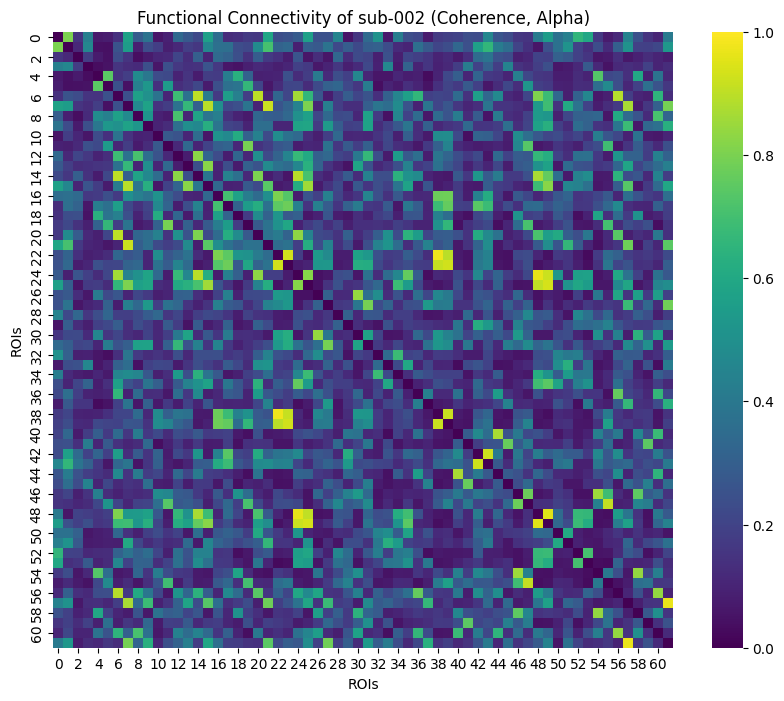

In [ ]:
import seaborn as sns

temp = fcSub2[0,:,:,2]
# conmat = fc_data[i, :, :, j] + fc_data[i, :, :, j].T - np.diag(np.diag(fc_data[i, :, :, j]))

temp1 = temp + temp.T - np.diag(np.diag(temp))
plt.figure(figsize=(10, 8))
# sns.heatmap(temp1, cmap='viridis', annot=False, cbar=True, cmap='coolwarm', square=True,vmin=-1, vmax=1)
sns.heatmap(temp1, cmap='viridis', annot=False, cbar=True,vmin=0, vmax=1)

plt.title('Functional Connectivity of sub-002 (Coherence, Alpha)')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

In [ ]:
!pip install mne
!pip install mne_connectivity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0


## Statistics Analysis

*   1. Similarity between 10 subjects -- Pearson correlation coefficient
*   2. T-test of subject with 2 similar methods
*   3. ANOVA of subject with 2 similar methods

In [ ]:
# Define a 3D array to store all lower-triangle elements for 10 subjects
# shape=(Subjects, methods*freqBands, elements)
transformed_fc = np.zeros((10, 24, 1891))

fc_list = list(fc_results.keys())

for subIdx in range(len(fc_list)):
    # shape=(4,62,62,4)=(methods,sources,sources,freqBands)
    sub_fc = fc_results[fc_list[subIdx]]

    for method_Idx in range(n_con_methods):
        for freq_band_Idx in range(n_freq_bands):
            #shape=(sources,sources)=(62,62)
            temp_matrix = sub_fc[method_Idx, :, :, freq_band_Idx]

            # Notice: all elements of functional connectivity are "0", except for the lower-triangle position
            lower_tri_elements = temp_matrix[np.tril_indices(62, -1)]

            # number of frequency bands = 4
            target_Idx = method_Idx * 4 + freq_band_Idx

            transformed_fc[subIdx,target_Idx,:] = lower_tri_elements


# Check for NaN and infinity
print(np.isnan(transformed_fc).any())
print(np.isinf(transformed_fc).any())


False
False


In [ ]:
num_subjects = 10
num_methods_freq_bands = 24  # 6 methods * 4 frequency bands
num_elements = 1891

# 初始化一个4D数组来存储所有的相似性矩阵
# 形状为 (24, 10, 10)，其中24是方法与频带的组合数，10x10是受试者间的相似性矩阵
similarity_matrices = np.zeros((num_methods_freq_bands, num_subjects, num_subjects))

# 对每种方法与频带的组合计算相似性矩阵
for method_freq_index in range(num_methods_freq_bands):
    for i in range(num_subjects):
        for j in range(i+1, num_subjects):  # 避免重复计算和自我比较
            # 计算当前方法与频带组合下两个受试者的皮尔逊相关系数
            correlation_coefficient = np.corrcoef(transformed_fc[i, method_freq_index, :], transformed_fc[j, method_freq_index, :])[0, 1]
            # 存储相关系数
            similarity_matrices[method_freq_index, i, j] = correlation_coefficient
            similarity_matrices[method_freq_index, j, i] = correlation_coefficient  # 确保矩阵是对称的

# similarity_matrices 就是计算得到的24个相似性矩阵

# Modification: use fixed scale from -1 to 1 for every heatmap

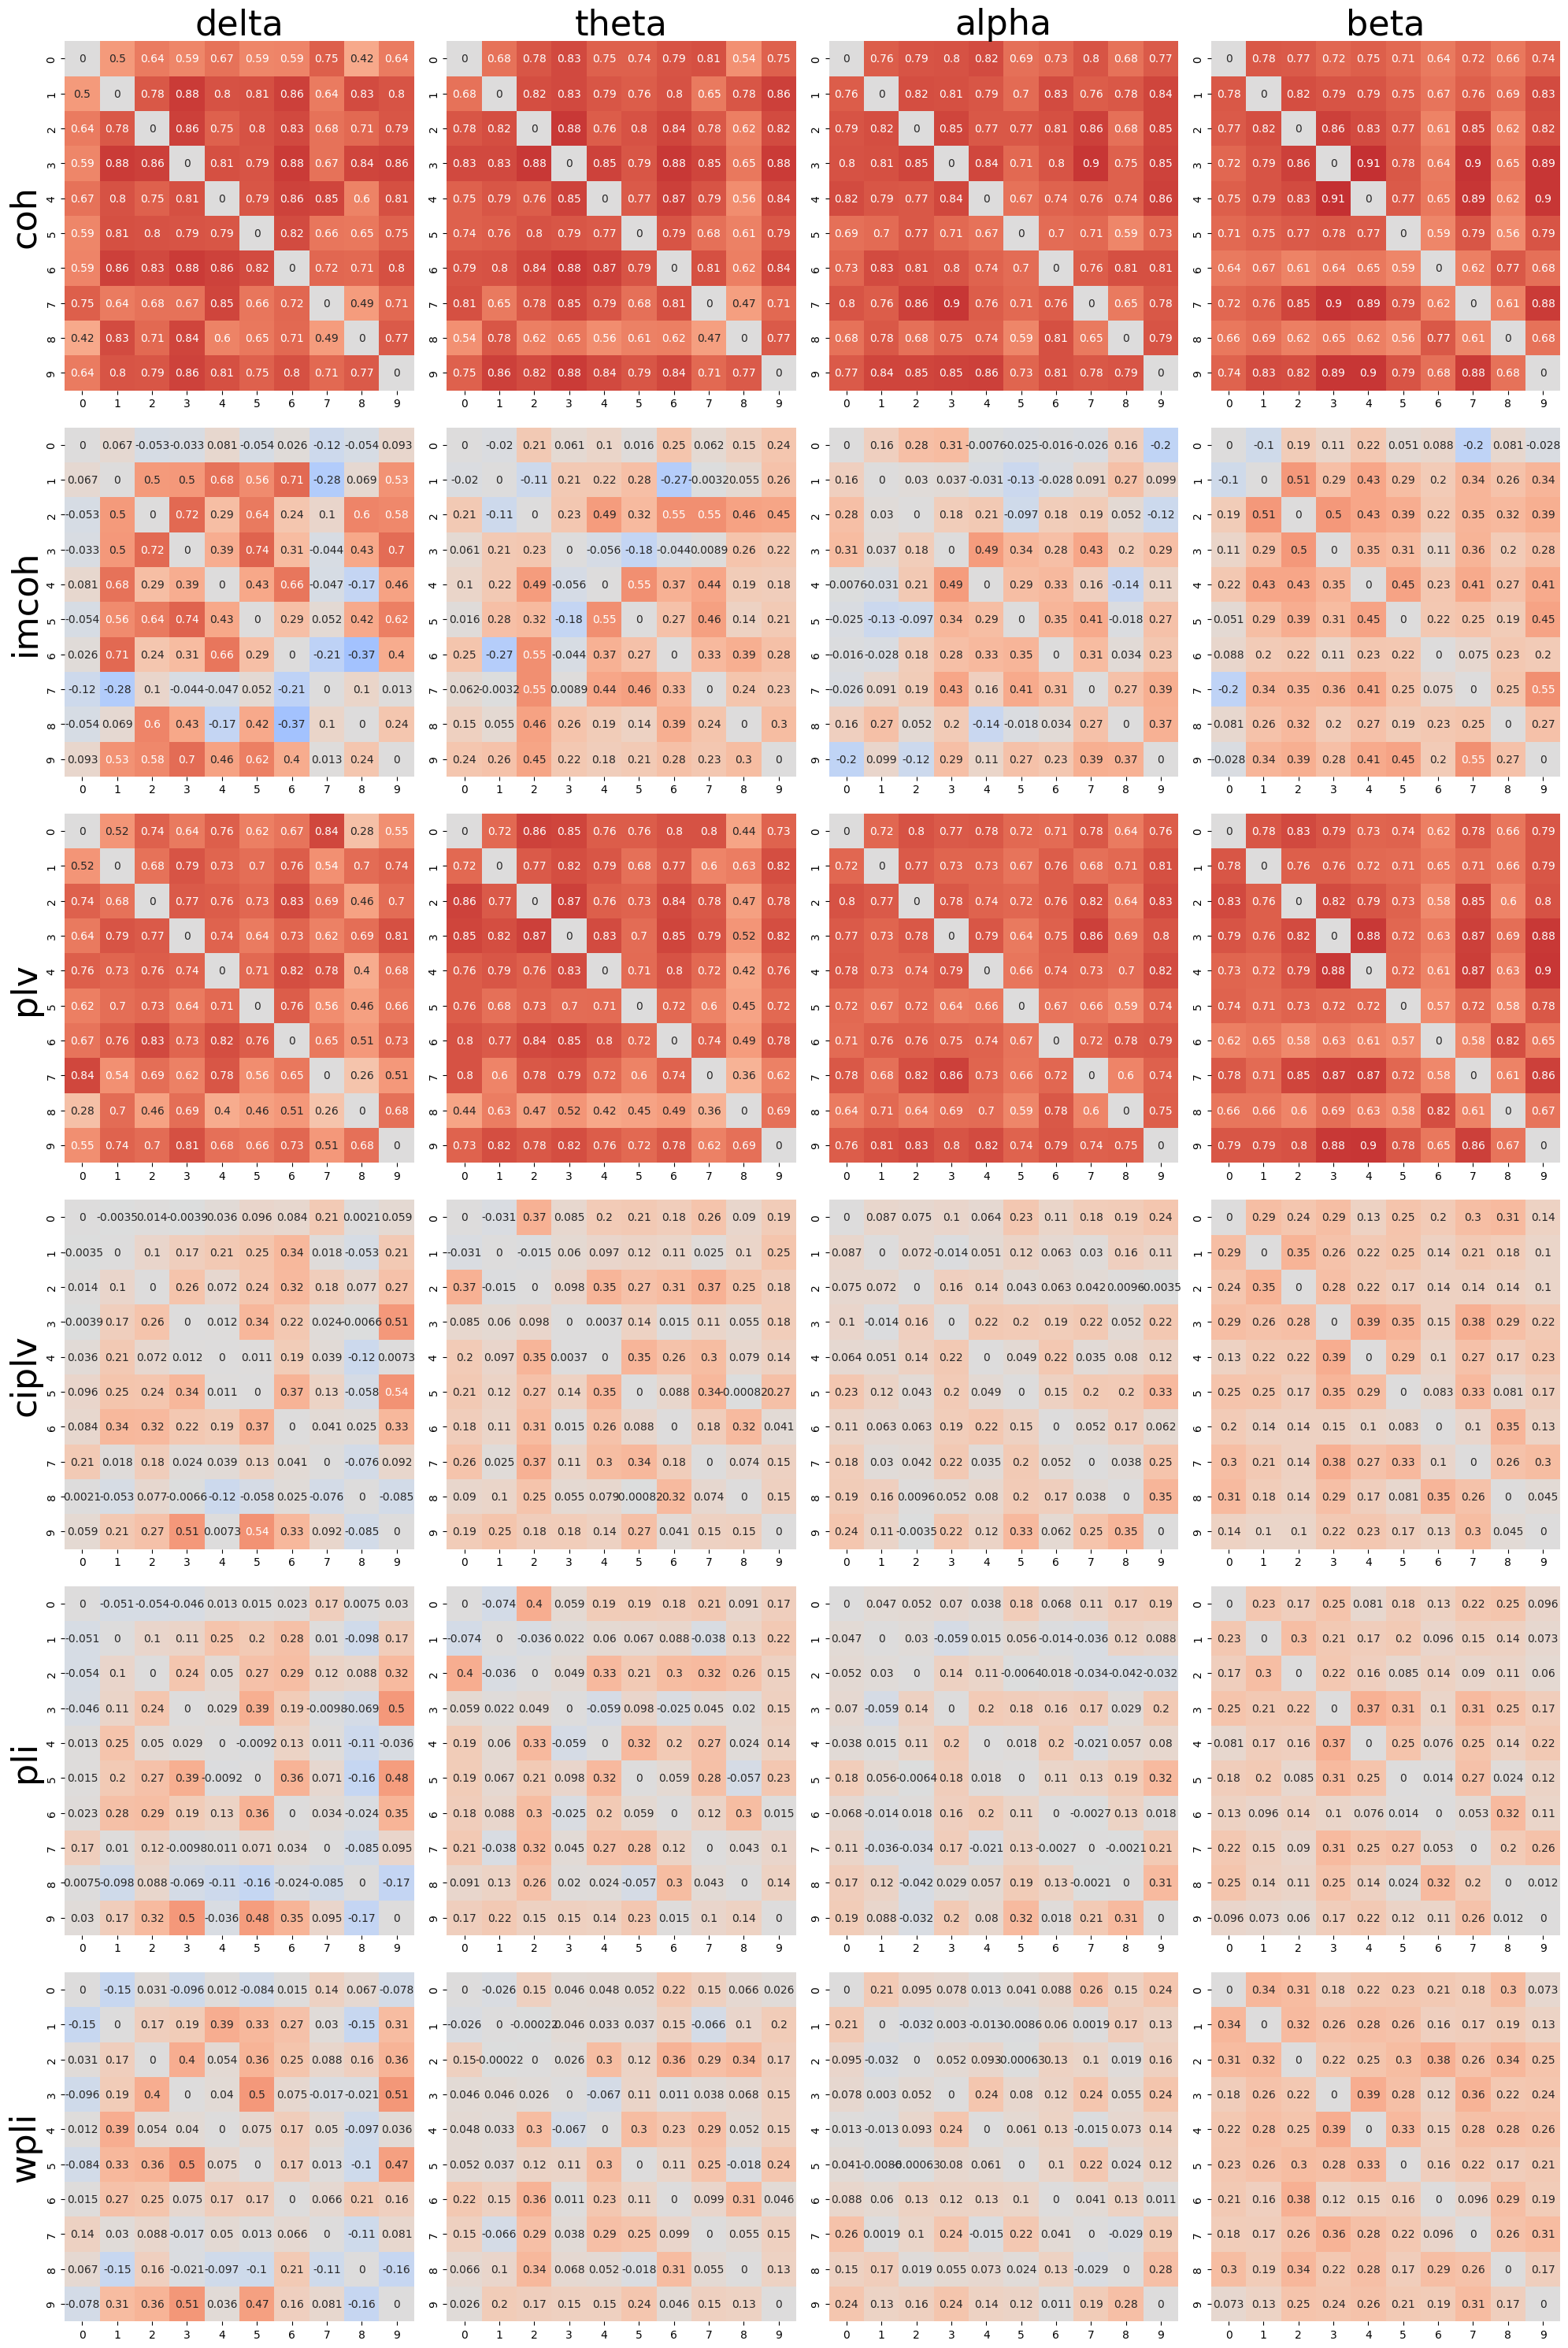

In [ ]:
import seaborn as sns

# 方法名称和频带名称
connectivity_methods = ["coh", "imcoh", "plv", "ciplv", "pli", "wpli"]
freq_band_names = ["delta", "theta", "alpha", "beta"]  # 获取频带的名称列表

# 绘制所有相似性矩阵的热图
fig, axes = plt.subplots(nrows=len(connectivity_methods), ncols=len(freq_band_names), figsize=(20, 30))

for i, method in enumerate(connectivity_methods):
    for j, freq_band in enumerate(freq_band_names):
        # 计算当前方法和频带组合的索引
        index = i * len(freq_band_names) + j
        sns.heatmap(similarity_matrices[index, :, :], ax=axes[i, j], cmap='coolwarm', square=True, cbar=False, annot=True, vmin=-1, vmax=1)
        # 设置子图标题
        if i == 0:
            axes[i, j].set_title(freq_band,fontsize=32)
        if j == 0:
            axes[i, j].set_ylabel(method,fontsize=32)

# 调整布局
plt.tight_layout()
plt.show()
## Fixed Scale

## Bar plot

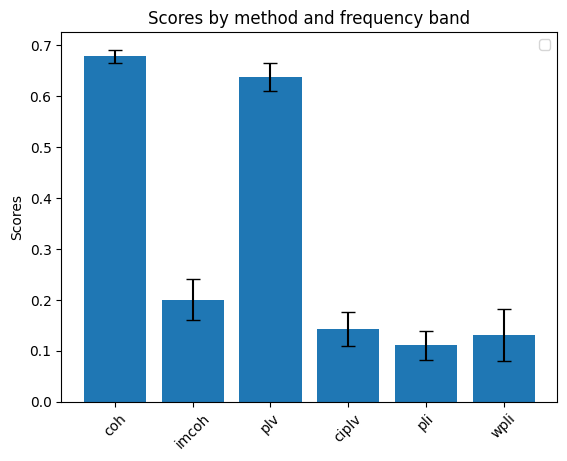

In [ ]:
# Global Average (计算每个矩阵的全局平均值)
matrix_means = np.array([np.mean(matrix) for matrix in similarity_matrices])

# 为每种方法聚合所有频带的平均值
method_means = []
method_stds = []
for i in range(n_con_methods):
    # 获取当前方法的所有频带平均值
    method_data = matrix_means[i*len(freq_band_names):(i+1)*len(freq_band_names)]
    # 计算平均值和标准差
    method_means.append(np.mean(method_data))
    method_stds.append(np.std(method_data))

# 绘制条形图
x = np.arange(n_con_methods)  # 方法标签的位置
fig, ax = plt.subplots()
bars = ax.bar(x, method_means, yerr=method_stds, capsize=5)

# 添加一些文本标签
ax.set_ylabel('Scores')
ax.set_title('Scores by method and frequency band')
ax.set_xticks(x)
ax.set_xticklabels(connectivity_methods)
ax.legend()

plt.xticks(rotation=45)  # 旋转x轴标签，以便它们更容易阅读
plt.show()

## Boxplot

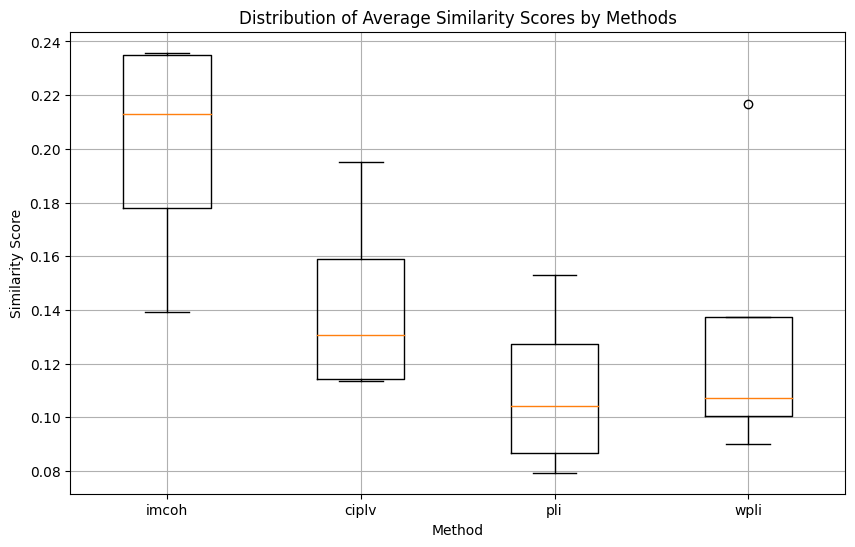

In [ ]:
method_indices = [1,3,4,5]
selected_methods = ["imcoh", "ciplv", "pli", "wpli"]

selected_data = []
for index in method_indices:
    # 获取每个选中方法的数据
    method_data = matrix_means[index*len(freq_band_names):(index+1)*len(freq_band_names)]
    selected_data.append(method_data)

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(selected_data, labels=selected_methods)
plt.title('Distribution of Average Similarity Scores by Methods')
plt.ylabel('Similarity Score')
plt.xlabel('Method')
plt.grid(True)
plt.show()

#最小值、第一四分位数（箱子底部）、中位数（箱子中的橙色线）、第三四分位数（箱子顶部）和最大值。可能的异常值（如果有的话）会以单独的点显示，通常这些点会超出箱子须（whiskers）的范围。

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 方法名称和频带名称
connectivity_methods = ["coh", "imcoh", "plv", "ciplv", "pli", "wpli"]
freq_band_names = ["delta", "theta", "alpha", "beta"]

# 准备数据
data = []

for method_idx, method in enumerate(connectivity_methods):
    for freq_idx, freq in enumerate(freq_band_names):
        index = method_idx * len(freq_band_names) + freq_idx
        for i in range(10):
            for j in range(10):
                data.append({
                    'method': method,
                    'frequency': freq,
                    'value': similarity_matrices[index, i, j]
                })

df = pd.DataFrame(data)

# 执行双因素 ANOVA
model = ols('value ~ C(method) + C(frequency) + C(method):C(frequency)', data=df).fit()
anova_results = anova_lm(model, typ=2)

print(anova_results)


                            sum_sq      df           F        PR(>F)
C(method)               141.745489     5.0  824.080797  0.000000e+00
C(frequency)              1.301053     3.0   12.606783  3.553478e-08
C(method):C(frequency)    1.486424    15.0    2.880594  1.610005e-04
Residual                 81.736471  2376.0         NaN           NaN


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


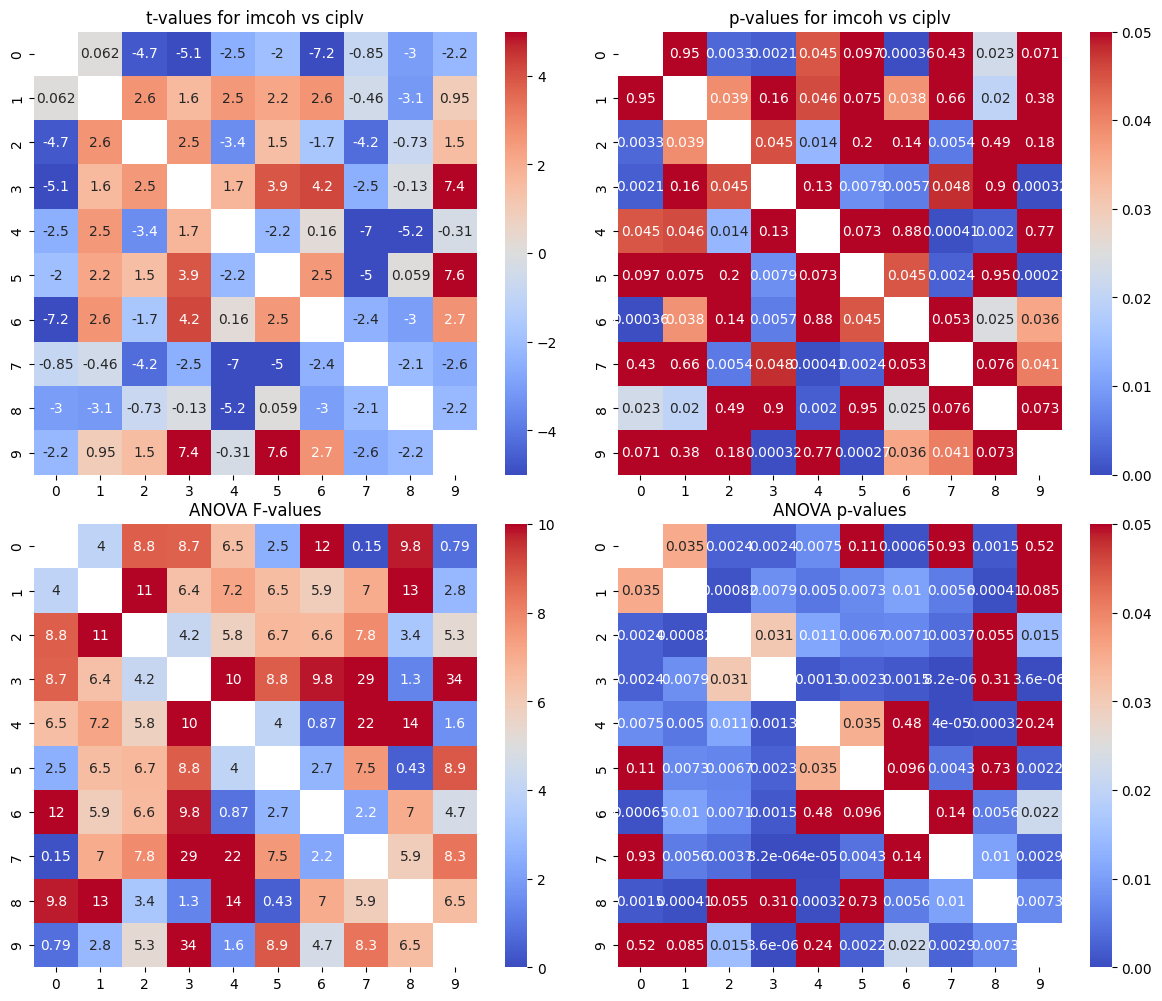

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# 方法名称和频带名称
connectivity_methods = ["coh", "imcoh", "plv", "ciplv", "pli", "wpli"]
freq_band_names = ["delta", "theta", "alpha", "beta"]
selected_methods = ["imcoh", "ciplv", "pli", "wpli"]

# 方法索引
selected_indices = [connectivity_methods.index(method) for method in selected_methods]
num_methods = len(connectivity_methods)
num_freqs = len(freq_band_names)

# 提取选定方法的数据 (4 方法 x 4 频带)
selected_matrices = []
for method in selected_methods:
    for freq in range(num_freqs):
        index = connectivity_methods.index(method) * num_freqs + freq
        selected_matrices.append(similarity_matrices[index, :, :])
selected_matrices = np.array(selected_matrices)

# 计算 t-test
# 这里选择前两个方法进行 t-test
method1_index = 0  # imcoh
method2_index = 1  # ciplv

t_values = np.zeros((10, 10))
p_values = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        t_values[i, j], p_values[i, j] = ttest_ind(selected_matrices[method1_index::num_freqs, i, j].flatten(),
                                                   selected_matrices[method2_index::num_freqs, i, j].flatten())

# 计算 ANOVA
anova_values = np.zeros((10, 10))
anova_p_values = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        anova_values[i, j], anova_p_values[i, j] = f_oneway(
            *[selected_matrices[method_idx::num_freqs, i, j].flatten() for method_idx in range(len(selected_methods))]
        )

# 绘制 t-test 和 ANOVA 的热图
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.heatmap(t_values, ax=axes[0, 0], cmap='coolwarm', square=True, cbar=True, annot=True, vmin=-5, vmax=5)
axes[0, 0].set_title('t-values for imcoh vs ciplv')

sns.heatmap(p_values, ax=axes[0, 1], cmap='coolwarm', square=True, cbar=True, annot=True, vmin=0, vmax=0.05)
axes[0, 1].set_title('p-values for imcoh vs ciplv')

sns.heatmap(anova_values, ax=axes[1, 0], cmap='coolwarm', square=True, cbar=True, annot=True, vmin=0, vmax=10)
axes[1, 0].set_title('ANOVA F-values')

sns.heatmap(anova_p_values, ax=axes[1, 1], cmap='coolwarm', square=True, cbar=True, annot=True, vmin=0, vmax=0.05)
axes[1, 1].set_title('ANOVA p-values')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway


connectivity_methods = ["coh", "imcoh", "plv", "ciplv", "pli", "wpli"]
selected_methods = ["imcoh", "ciplv", "pli", "wpli"]

# 方法索引
selected_indices = [connectivity_methods.index(method) for method in selected_methods]

# 整合所有选定方法的数据
data_for_anova = []

for method in selected_indices:
    method_data = similarity_matrices[method*4:,method*4+4 :, :]

    # 计算每种方法所有受试者的4个频率带的平均值
    method_average = np.mean(method_data, axis=(0))
    data_flat = method_average.flatten()
    data_for_anova.append(data_flat)

# 执行ANOVA
f_stat, p_value = f_oneway(*data_for_anova)

# 打印ANOVA结果
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: nan
P-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


## One-way ANOVA for 4 corrected methods:
"imcoh", "ciplv", "pli", "wpli"

In [ ]:
from scipy.stats import f_oneway

# 假设 transformed_fc 是形状为 (10, 24, 1891) 的数组
# 已经给出的方法和相应的索引
selected_methods = ["imcoh", "ciplv", "pli", "wpli"]
methods_indices = {"imcoh": 1, "ciplv": 3, "pli": 4, "wpli": 5}

# 整合所有选定方法的数据
data_for_anova = []

# 计算每种方法的平均值
for method in selected_methods:
    # 提取每种方法的所有频率带数据
    method_data = transformed_fc[:, methods_indices[method]*4:methods_indices[method]*4 + 4, :]
    # 计算每种方法所有受试者的4个频率带的平均值
    method_average = np.mean(method_data, axis=(0))
    data_flat = method_average.flatten()
    data_for_anova.append(data_flat)

# 执行ANOVA
f_stat, p_value = f_oneway(*data_for_anova)

# 打印ANOVA结果
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# similirity matrix for ANOVA

F-statistic: 33866.53130413241
P-value: 0.0
